In [79]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
from os import path

from scipy.spatial.distance import cdist

import datetime
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic


In [80]:
df = pd.read_csv('clustering_data.csv')
df

,Unnamed: 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10
0,0,-1.784220,9.139177,2.517077,-6.691300,3.332583,-6.189314,-8.294717,-5.527558,-9.150377,-3.437419
1,1,4.513056,-6.242134,-9.764999,8.975386,0.213133,-5.610271,6.194787,-0.247325,-1.000023,-9.091131
2,2,1.076570,-6.806062,-11.354346,11.589776,1.223487,-4.481565,5.119435,-0.036395,-2.308850,-5.820222
3,3,-0.203146,-6.098289,10.389102,-3.527880,-6.376361,3.444334,-0.331659,-3.784060,-6.922082,-3.463537
4,4,-4.488164,9.539276,0.414895,-3.298754,4.835677,-6.927819,-9.123490,-3.135282,-10.179017,-3.273429
...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,-1.946019,-5.311701,6.450032,-3.702229,-6.876948,1.629110,-3.398310,-4.534716,-6.746924,-4.928462
2496,2496,3.688606,-9.763320,-6.745432,8.385506,-0.077451,-7.701742,4.784362,-1.560023,-1.079255,-6.833646
2497,2497,-6.151428,-0.120076,6.293342,1.694578,-1.065751,-5.811064,-10.625511,3.157429,-3.792363,-6.793285
2498,2498,-2.641632,8.073094,0.956380,-5.387133,4.496828,-6.396634,-9.163113,-1.719945,-10.508237,-3.756620


In [81]:
norm_df = (df-df.mean())/df.std()
norm_df.drop('Unnamed: 0', axis=1, inplace=True)
norm_df

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10
0,-0.346222,1.620719,0.289920,-1.159613,1.071976,-0.701901,-1.021742,-1.381947,-0.882014,0.213513
1,0.916851,-0.925118,-1.346161,1.851292,0.109209,-0.565861,0.987042,-0.051696,1.104972,-1.801868
2,0.227579,-1.018457,-1.557876,2.353739,0.421038,-0.300682,0.837958,0.001443,0.785891,-0.635886
3,-0.029099,-0.901310,1.338543,-0.551651,-1.924531,1.561433,0.082234,-0.942707,-0.338775,0.204202
4,-0.888565,1.686941,0.009891,-0.507616,1.535882,-0.875406,-1.136641,-0.779260,-1.132787,0.271970
...,...,...,...,...,...,...,...,...,...,...
2495,-0.378675,-0.771118,0.813824,-0.585158,-2.079029,1.134963,-0.342918,-1.131820,-0.296073,-0.318000
2496,0.751487,-1.507927,-0.943928,1.737926,0.019525,-1.057232,0.791505,-0.382405,1.085656,-0.997141
2497,-1.222173,0.088174,0.792951,0.452028,-0.285498,-0.613035,-1.344877,0.806065,0.424224,-0.982754
2498,-0.518197,1.444266,0.082021,-0.908972,1.431301,-0.750609,-1.142134,-0.422694,-1.213048,0.099727


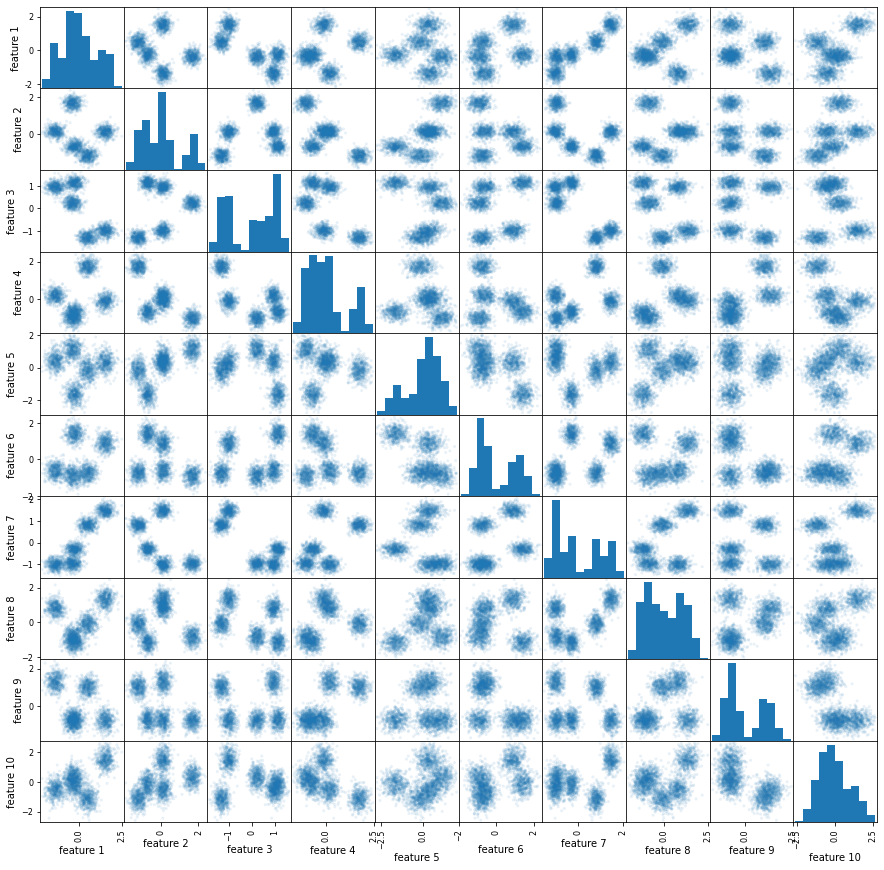

In [82]:
pd.plotting.scatter_matrix(norm_df, alpha=0.1, figsize=(15, 15));
if not path.exists('figs'):
    os.makedirs('figs')
plt.savefig('figs/scatter_matrix')

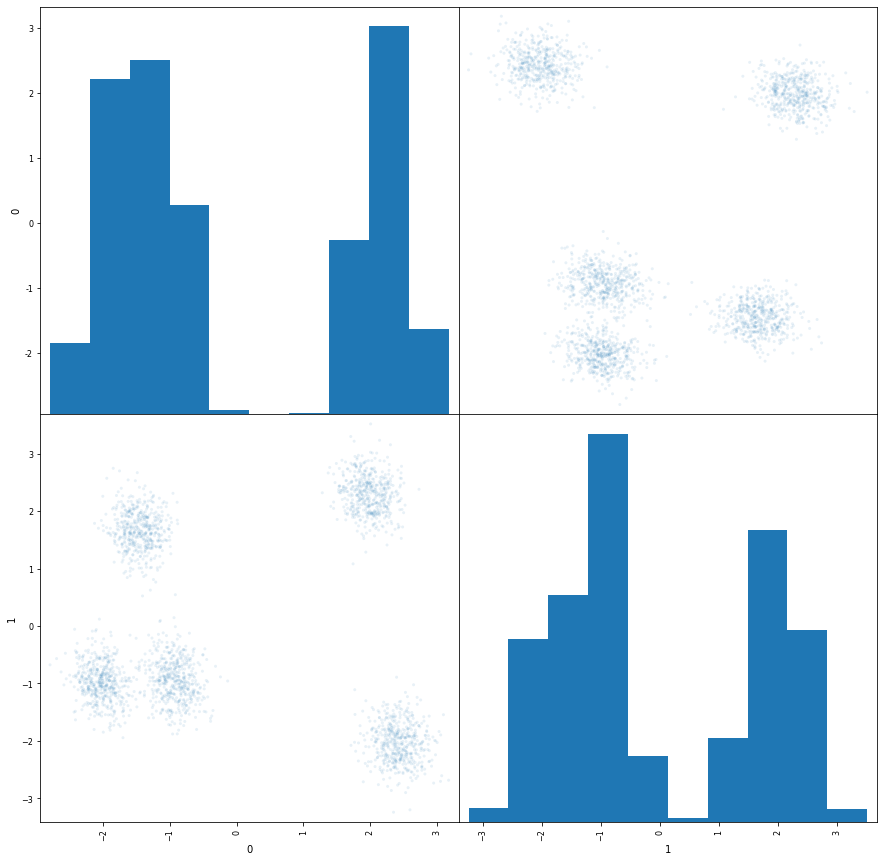

In [9]:
# Using PCA to see results of dimensionality reduction.
pca = PCA(n_components=2)
principalComponents = pd.DataFrame(pca.fit_transform(norm_df))
pd.plotting.scatter_matrix(principalComponents, alpha=0.1, figsize=(15, 15));
plt.savefig('figs/scatter_matrix_PCA')

In [10]:
def kmeans_data(df, lower, upper):
    clusters = pd.DataFrame()
    count = 0
    centroids = list()
    for i in range(lower, upper):
        count += 1
        kmeans = sklearn.cluster.KMeans(n_clusters=i).fit(df)
        centroids.append(kmeans.cluster_centers_)
        clusters[f'{i}_means cluster'] = kmeans.labels_[:]
    return clusters, centroids

In [11]:
def DBSCAN_data(df, lower=1, upper=10, min_s1=2, min_s2=10):
    clusters = pd.DataFrame()
    dists = [0.05 * i for i in range(lower, upper)]
    for min_s in range(min_s1, min_s2):
        for d in dists:
            dbscan = sklearn.cluster.DBSCAN(eps=d, min_samples=min_s).fit(df)
            clusters[f'DBSCAN r={round(d, 2)}, min_s={min_s} cluster'] = dbscan.labels_[:]
    return clusters

In [12]:
# Cluster indexing
def index_clusters(cluster_df):
    idx = list()
    col = 0
    for key, value in cluster_df.iteritems():
        idx.append(dict())
        for key2, value2 in value.items():
            if value2 not in idx[col].keys():
                idx[col][value2] = list()
            idx[col][value2].append(key2)
        col += 1
    return idx

In [74]:
# We go through pairs of intra cluster and intra cluster and calculate values:
# inter and intra weight, Wmax(Nin), Wmin(Nin), Silhouette coefficient
def Internal_calc(cluster_idx, W):
    intra_weight = 0
    inter_weight = 0
    Nin = 0
    Nout = 0
    mu_out_list = list()
    SC = 0
    
    # Going through each cluster and calculating the intra cluster weight sum.
    for cluster1 in cluster_idx.keys():
        if cluster1 == -1:
            continue
            
        ni = len(cluster_idx[cluster1])
        Nin += 0.5 * ni * (ni - 1)
        
        # Intra weight sum
        for point1 in cluster_idx[cluster1]:
            intra_sum = 0
            for point2 in cluster_idx[cluster1]:
                intra_sum += W[point1][point2]
            
            mu_in = intra_sum / (ni - 1)
            intra_weight += 0.5 * intra_sum

            mu_out_list = list()
            # Going through each cluster
            for cluster2 in cluster_idx.keys():
                n2 = len(cluster_idx[cluster2])
                inter_sum = 0
                
                # Skipping the points with no cluster (DBSCAN)
                if cluster2 == -1 or cluster1 == cluster2:
                    continue
                
                # Going through each point in the second cluster
                for point2 in cluster_idx[cluster2]:
                        inter_sum += W[point1][point2]
               
                mu_out_list.append(inter_sum / n2)
                inter_weight += 0.5 * inter_sum
            
            if not mu_out_list:
                continue
                
            # SC = sum of Si / n
            mu_out_min = min(mu_out_list)
            if mu_in != 0 and mu_out_min != 0:
                SC += (mu_out_min - mu_in) / max((mu_out_min, mu_in))  # Silhouette Coefficient
                
    if Nin != 0:
        SC /= (0.5 * W.shape[0] * (W.shape[0] - 1))
        Nout = 0.5 * W.shape[0] * (W.shape[0] - 1) - Nin
        Nin = int(Nin)
        Wtemp = W.ravel()
        Wtemp.sort()
        return intra_weight, inter_weight, Nin, Nout, np.sum(Wtemp[:Nin]), np.sum(Wtemp[-Nin:]), SC
    else:
        return 1, 1, 1, 100, 10, 1, -1

In [14]:
# Measurs
def BetaCV(Win, Wout, Nin, Nout):
    return (Nout / Nin) * (Win / Wout)

def Cindex(Win, Wmin, Wmax):
    return (Win - Wmin) / (Wmax - Wmin)

def WSS(df, cluster_idx, centroids):
    SSE = 0
    for cluster in cluster_idx.keys():   
        for point in cluster_idx[cluster]:
            if cluster == -1:
                continue
            SSE += np.sum((df.iloc[point].values - centroids[cluster]) * (df.iloc[point].values - centroids[cluster]))
    
    return SSE

def DB(df, cluster_idx, centroids):
    
    # Calculating the dispersion of each cluster first. 
    sigma = dict()
    for cluster in cluster_idx.keys():
        sigma[cluster] = 0
        n = len(cluster_idx[cluster])
        for point in cluster_idx[cluster]:
            dist = np.sum((df.iloc[point].values - centroids[cluster]) * (df.iloc[point].values - centroids[cluster])) / n
            if dist < np.inf:
                sigma[cluster] += dist
    
    # Calculating the sum of Max DBij 
    DB_sum = 0
    count1 = 0
    count = 0
    for cluster1 in cluster_idx.keys():
        count += 1 
        DB_max = 0
        for cluster2 in cluster_idx.keys():
            if cluster2 == cluster1:
                continue
            curr_DB = sigma[cluster1] + sigma[cluster2] / (np.linalg.norm(centroids[cluster1] - centroids[cluster2]))
            if curr_DB >= DB_max:
                DB_max = curr_DB
        DB_sum += DB_max
    return DB_sum / count
                                                

In [57]:
# Calculating the centroids of clustering
def calc_centroids(cluster_idx, df):
    centroids = list()
    for idx in cluster_idx:
        centroids_i = list()
        for cluster in idx.keys():
            center = 0
            for point in idx[cluster]:
                center += df.iloc[point].values
            centroids_i.append(center / len(idx[cluster]))
        centroids.append(np.array(centroids_i))
    return centroids

In [58]:
# Looping over clusters 
def loop_clusters(clusters_idx, W, df, is_kmeans, centroids=list()):
    BetaCV_list = list()
    Cindex_list = list()
    SC_list = list()
    WSS_list = list()
    DB_list = list()
    count = 0
    for idx in clusters_idx:
        Win, Wout, Nin, Nout, Wmin, Wmax, SC = Internal_calc(idx, W)
        BetaCV_list.append(BetaCV(Win, Wout, Nin, Nout))
        Cindex_list.append(Cindex(Win, Wmin, Wmax))
        SC_list.append(SC)
        WSS_list.append(WSS(df, idx, centroids[count]))
        DB_list.append(DB(df, idx, centroids[count]))
        count += 1
    return BetaCV_list, Cindex_list, SC_list, WSS_list, DB_list

In [17]:
# Distance matrix
DistMatrix = cdist(principalComponents, principalComponents, 'euclid')

In [72]:
l = 3
u = 13
k_means_clusters, k_means_centroids = kmeans_data(principalComponents, l, u)
k_means_clusters

,3_means cluster,4_means cluster,5_means cluster,6_means cluster,7_means cluster,8_means cluster,9_means cluster,10_means cluster,11_means cluster,12_means cluster
0,1,1,0,4,2,4,0,6,8,2
1,2,0,1,1,3,3,8,9,10,10
2,2,0,1,1,3,7,2,2,2,3
3,1,1,4,0,5,6,7,5,3,4
4,1,1,0,4,2,4,0,0,4,9
...,...,...,...,...,...,...,...,...,...,...
2495,1,1,4,5,4,2,4,4,6,11
2496,2,0,1,1,3,3,8,9,7,10
2497,1,3,3,3,0,0,3,3,9,1
2498,1,1,0,4,2,4,0,6,8,2


In [75]:
k_means_clusters_idx = list()
k_means_clusters_idx = index_clusters(k_means_clusters)
BetaCV_l_kmeans, Cindex_l_kmeans, SC_l_kmeans, WSS_l_kmeans, DB_l_kmeans = loop_clusters(k_means_clusters_idx, DistMatrix, principalComponents, True, k_means_centroids)

1373750 1750000.0 4295468.6495742155 5427363.8840044085
873750 2250000.0 2724815.7497115224 6998016.783867109
623759 2499991.0 1944642.781470636 7778189.752107995
559300 2564450.0 1740774.761372171 7982057.772206442
496816 2626934.0 1550613.4259332751 8172219.107645346
434457 2689293.0 1356826.843320586 8366005.690258004
372188 2751562.0 1159952.4288288676 8562880.104749735
311748 2812002.0 974248.4741965818 8748584.05938202
291944 2831806.0 912536.467490562 8810296.066088036
272951 2850799.0 853128.9328048858 8869703.6007737


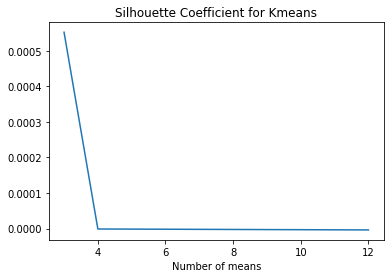

In [20]:
plt.plot(range(l, u), SC_l_kmeans)
plt.title('Silhouette Coefficient for Kmeans')
plt.xlabel('Number of means')
plt.savefig('figs/silhouette_kmeans')

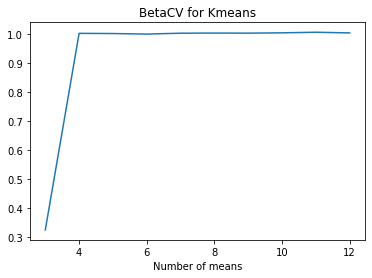

In [21]:
plt.plot(range(l, u), BetaCV_l_kmeans)
plt.title('BetaCV for Kmeans')
plt.xlabel('Number of means')
plt.savefig('figs/BetaCV_kmeans')

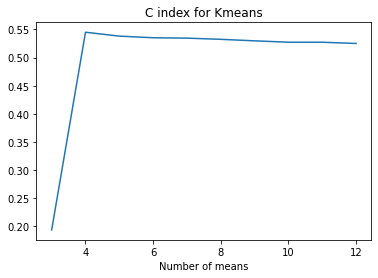

In [22]:
plt.plot(range(l, u), Cindex_l_kmeans)
plt.title('C index for Kmeans')
plt.xlabel('Number of means')
plt.savefig('figs/Cindex_kmeans')

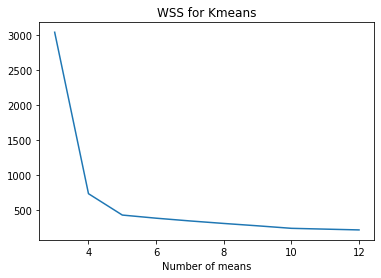

In [23]:
plt.plot(range(l, u), WSS_l_kmeans)
plt.title('WSS for Kmeans')
plt.xlabel('Number of means')
plt.savefig('figs/WSS_kmeans')

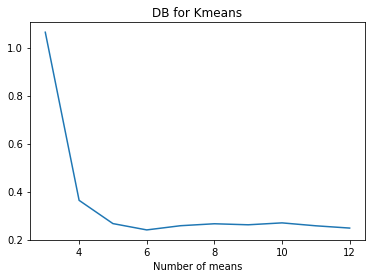

In [24]:
plt.plot(range(l, u), DB_l_kmeans)
plt.title('DB for Kmeans')
plt.xlabel('Number of means')
plt.savefig('figs/DB_kmeans')

In [53]:
l_dbscan = 1
u_dbscan = 30
dbscan_clusters = DBSCAN_data(principalComponents, l_dbscan, u_dbscan, 2, 3)
r_list = [0.05 * i for i in range(l_dbscan, u_dbscan)]
dbscan_clusters

,"DBSCAN r=0.05, min_s=2 cluster","DBSCAN r=0.1, min_s=2 cluster","DBSCAN r=0.15, min_s=2 cluster","DBSCAN r=0.2, min_s=2 cluster","DBSCAN r=0.25, min_s=2 cluster","DBSCAN r=0.3, min_s=2 cluster","DBSCAN r=0.35, min_s=2 cluster","DBSCAN r=0.4, min_s=2 cluster","DBSCAN r=0.45, min_s=2 cluster","DBSCAN r=0.5, min_s=2 cluster",...,"DBSCAN r=1.0, min_s=2 cluster","DBSCAN r=1.05, min_s=2 cluster","DBSCAN r=1.1, min_s=2 cluster","DBSCAN r=1.15, min_s=2 cluster","DBSCAN r=1.2, min_s=2 cluster","DBSCAN r=1.25, min_s=2 cluster","DBSCAN r=1.3, min_s=2 cluster","DBSCAN r=1.35, min_s=2 cluster","DBSCAN r=1.4, min_s=2 cluster","DBSCAN r=1.45, min_s=2 cluster"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,5,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2497,8,3,2,2,2,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
dbscan_clusters_idx = index_clusters(dbscan_clusters)
dbscan_centroids = calc_centroids(dbscan_clusters_idx, principalComponents)
BetaCV_l_dbscan, Cindex_l_dbscan, SC_l_dbscan, WSS_l_dbscan, DB_l_dbscan = loop_clusters(dbscan_clusters_idx, DistMatrix, principalComponents, True, dbscan_centroids)


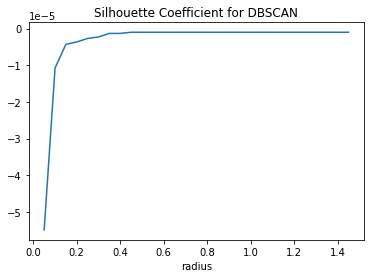

In [60]:
plt.plot(r_list, SC_l_dbscan)
plt.title('Silhouette Coefficient for DBSCAN')
plt.xlabel('radius')
plt.savefig('figs/silhouette_DBSCAN')

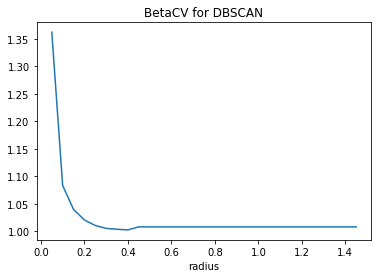

In [61]:
plt.plot(r_list, BetaCV_l_dbscan)
plt.title('BetaCV for DBSCAN')
plt.xlabel('radius')
plt.savefig('figs/BetaCV_DBSCAN')

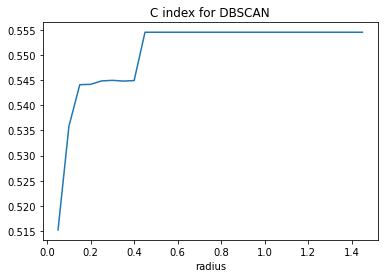

In [62]:
plt.plot(r_list, Cindex_l_dbscan)
plt.title('C index for DBSCAN')
plt.xlabel('radius')
plt.savefig('figs/Cindex_DBSCAN')

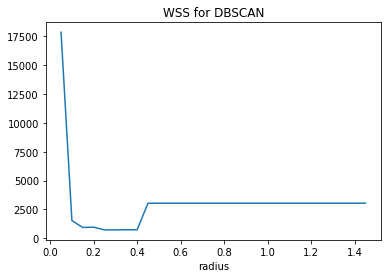

In [63]:
plt.plot(r_list, WSS_l_dbscan)
plt.title('WSS for DBSCAN')
plt.xlabel('radius')
plt.savefig('figs/WSS_DBSCAN')

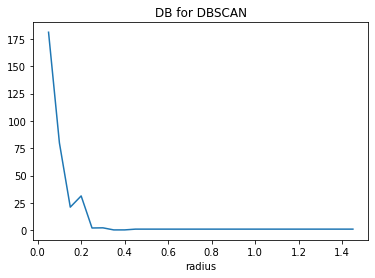

In [64]:
plt.plot(r_list, DB_l_dbscan)
plt.title('DB for DBSCAN')
plt.xlabel('radius')
plt.savefig('figs/DB_DBSCAN')

In [65]:
def plot_clusters(cluster_idx, centroids, df, labels, clustering_type):
    n_rows = np.ceil(len(cluster_idx) / 5)
    fig = plt.figure(figsize=(2.5 * 5, 4 * n_rows))
    count = 1
    for idx in cluster_idx:
        colors = plt.cm.rainbow(np.linspace(0, 1, len(idx.keys())))
        ax = fig.add_subplot(n_rows, 5, count)
        cs = [None] * df.shape[0]
        for cluster in idx.keys():
            for point in idx[cluster]:
                cs[point] = colors[cluster]
        ax.scatter(df.iloc[:, 1], df.iloc[:, 0], c=cs)
        ax.set_title(labels[count - 1])
        count += 1
    plt.savefig(f'figs/{clustering_type}_clusters')
    fig.show

c:\users\sgvfe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


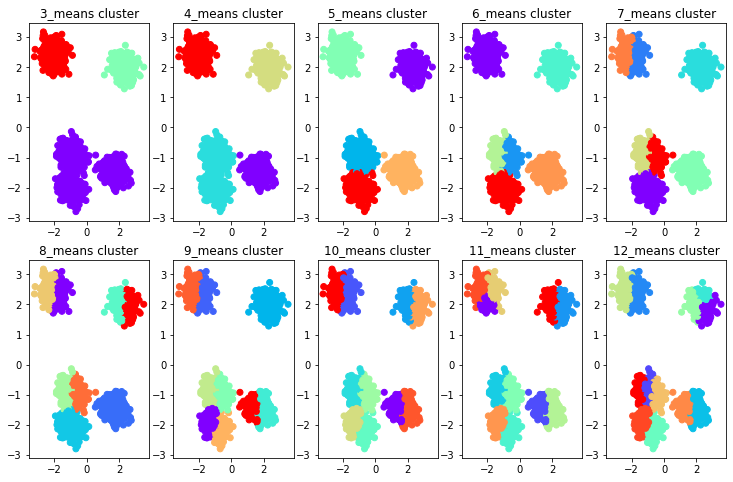

In [66]:
# Kmeans cluster
plot_clusters(k_means_clusters_idx, k_means_centroids, principalComponents, k_means_clusters.columns, 'kmeans')

c:\users\sgvfe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


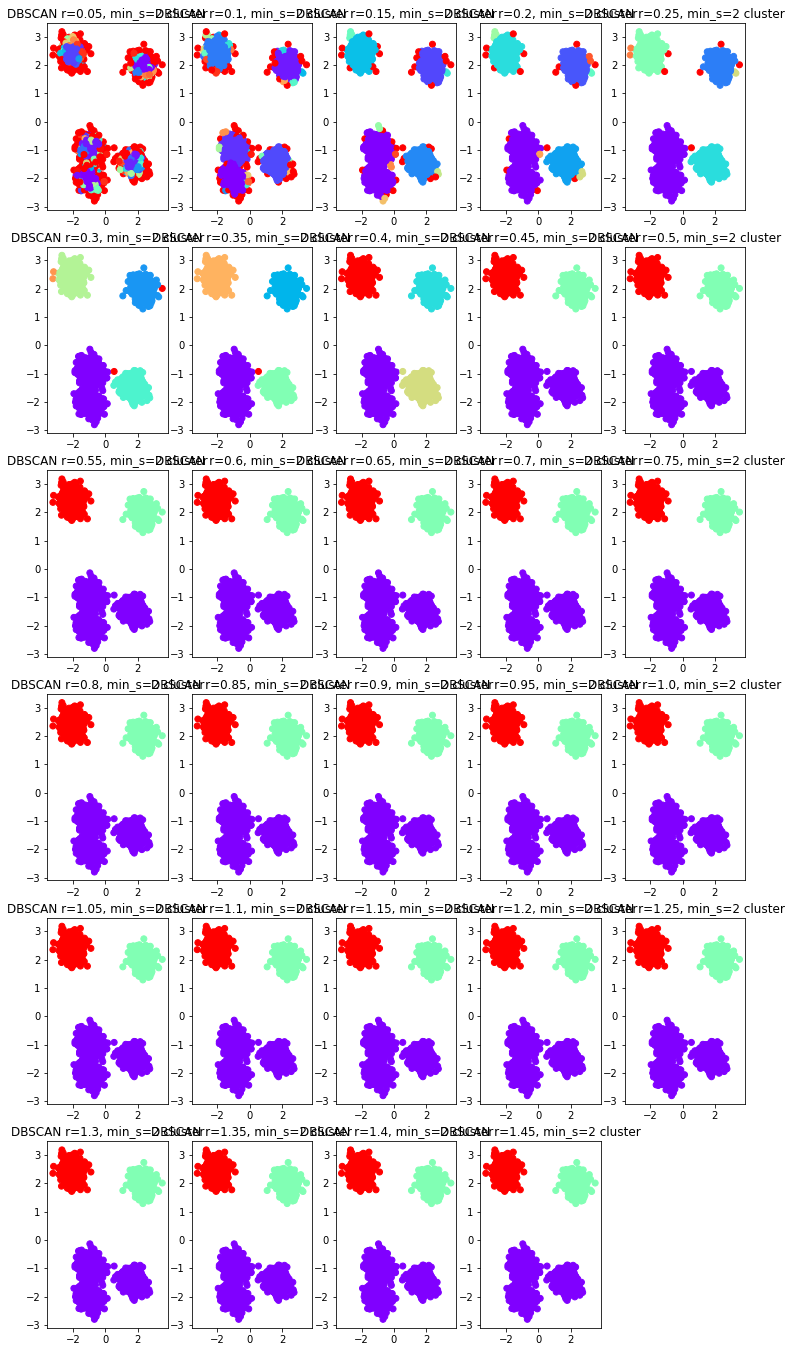

In [67]:
plot_clusters(dbscan_clusters_idx, dbscan_centroids, principalComponents, dbscan_clusters.columns, 'DBSCAN_r')

In [68]:
l_dbscan_r = 1
u_dbscan_r = 12
l_min_s = 2
u_min_s = 10
dbscan_clusters2 = DBSCAN_data(principalComponents, l_dbscan_r, u_dbscan_r)
r_list = [0.05 * i for i in range(l_dbscan_r, u_dbscan_r)]
dbscan_clusters2

,"DBSCAN r=0.05, min_s=2 cluster","DBSCAN r=0.1, min_s=2 cluster","DBSCAN r=0.15, min_s=2 cluster","DBSCAN r=0.2, min_s=2 cluster","DBSCAN r=0.25, min_s=2 cluster","DBSCAN r=0.3, min_s=2 cluster","DBSCAN r=0.35, min_s=2 cluster","DBSCAN r=0.4, min_s=2 cluster","DBSCAN r=0.45, min_s=2 cluster","DBSCAN r=0.5, min_s=2 cluster",...,"DBSCAN r=0.1, min_s=9 cluster","DBSCAN r=0.15, min_s=9 cluster","DBSCAN r=0.2, min_s=9 cluster","DBSCAN r=0.25, min_s=9 cluster","DBSCAN r=0.3, min_s=9 cluster","DBSCAN r=0.35, min_s=9 cluster","DBSCAN r=0.4, min_s=9 cluster","DBSCAN r=0.45, min_s=9 cluster","DBSCAN r=0.5, min_s=9 cluster","DBSCAN r=0.55, min_s=9 cluster"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2,2,0,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,5,2,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2496,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2497,8,3,2,2,2,2,2,2,0,0,...,2,2,2,2,2,2,2,2,2,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
dbscan_clusters2_idx = list()
dbscan_clusters2_idx = index_clusters(dbscan_clusters2)
dbscan2_centroids = calc_centroids(dbscan_clusters2_idx, principalComponents)
BetaCV_l_dbscan2, Cindex_l_dbscan2, SC_l_dbscan2, WSS_l_dbscan2, DB_l_dbscan2 = loop_clusters(dbscan_clusters2_idx, DistMatrix, principalComponents, True, dbscan2_centroids)

196649 2927101.0 609187.5112947964 6656184.356229829
552197 2571553.0 1721695.4304011413 7400383.093913639
842087 2281663.0 2625789.9572926704 6841730.299239058
856892 2266858.0 2670727.1920912284 6921220.95260942
868778 2254972.0 2709519.58633146 6957975.014749459
871756 2251994.0 2719015.473834334 6985863.194209428
873251 2250499.0 2722873.4149782592 6990301.058225893
873750 2250000.0 2724815.7497115224 6998016.783867109
1373750 1750000.0 4295468.6495742155 5427363.8840044085
1373750 1750000.0 4295468.6495742155 5427363.8840044085
1373750 1750000.0 4295468.6495742155 5427363.8840044085
196580 2927170.0 608768.6785372406 5769352.491101825
552185 2571565.0 1721633.115831157 7235342.832727993
842081 2281669.0 2625751.4980373695 6748504.597335167
856889 2266861.0 2670704.6130778217 6870095.484749929
868776 2254974.0 2709514.684122415 6936369.49553301
871755 2251995.0 2719012.7399194394 6974684.005201937
873251 2250499.0 2722873.4149782592 6990301.058225893
873750 2250000.0 2724815.749711

c:\users\sgvfe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


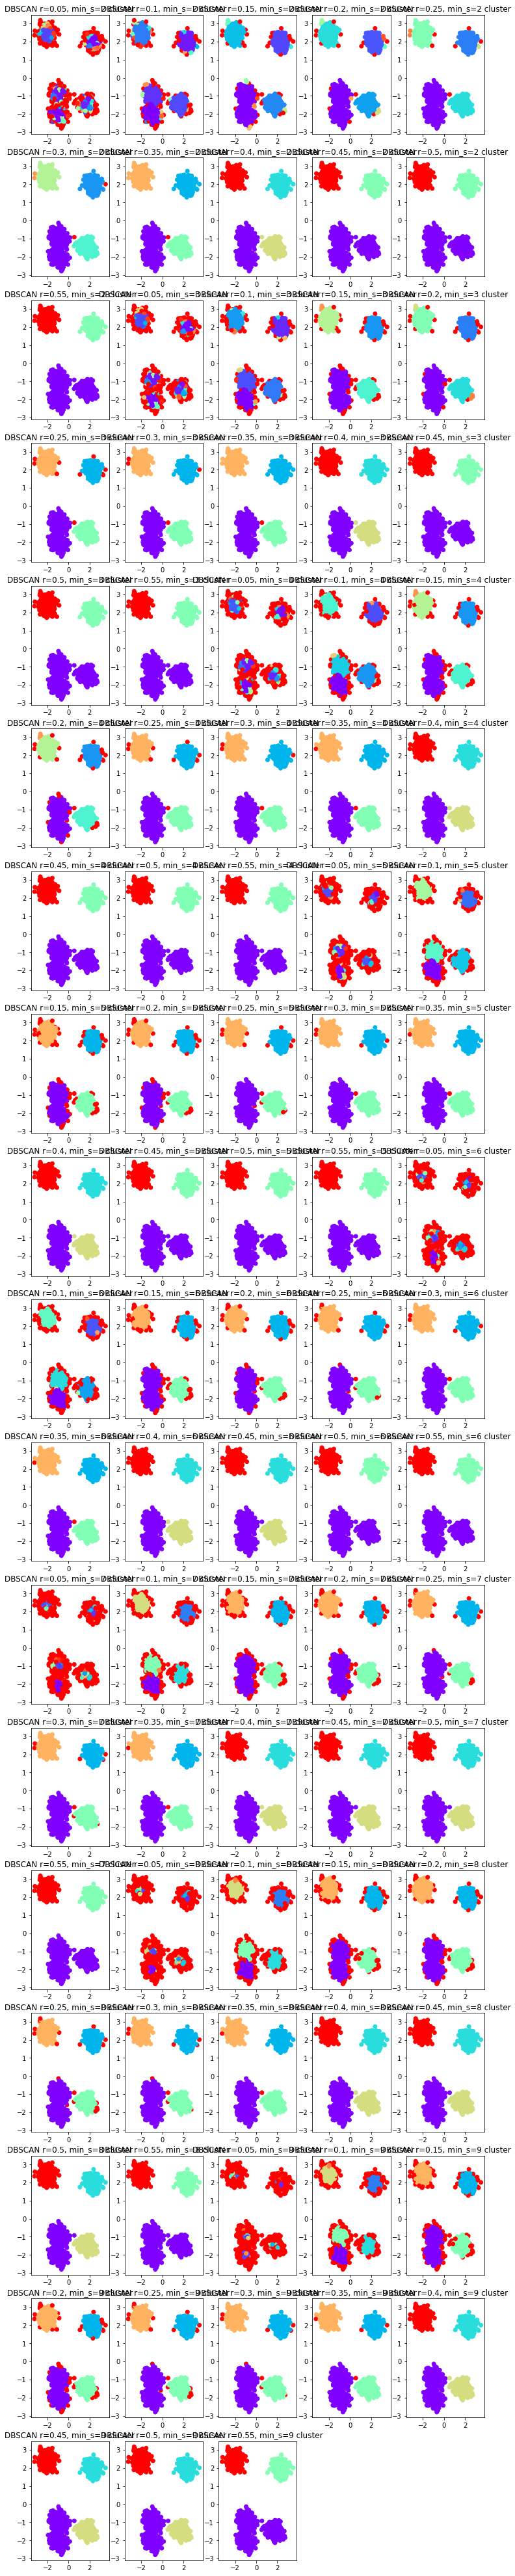

In [88]:
plot_clusters(dbscan_clusters2_idx, dbscan2_centroids, principalComponents, dbscan_clusters2.columns, 'DBSCAN_r_n')